# Brent Oil Price Analysis

This notebook is intended for initial data exploration and analysis of Brent oil prices. It will include steps for loading the data, performing exploratory data analysis (EDA), and visualizing trends.

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:

# Set visualization style
sns.set(style='whitegrid')

# Load the dataset
data_path = '../data/BrentOilPrices.csv'
brent_data = pd.read_csv(data_path)

# Display the first few rows of the dataset
brent_data.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [5]:
# Exploratory Data Analysis

# Summary statistics
brent_data.describe()


,Price
count,9011.000000
mean,48.420782
std,32.860110
min,9.100000
25%,19.050000
50%,38.570000
75%,70.090000
max,143.950000


In [6]:
print(brent_data.isnull().sum())

Date     0
Price    0
dtype: int64


In [7]:
# Convert 'Date' column to datetime format
brent_data['Date'] = pd.to_datetime(brent_data['Date'], format='%d-%b-%y', errors='coerce')

# Sort the data by date
brent_data = brent_data.sort_values(by='Date')

brent_data['Date'].head()

0   1987-05-20
1   1987-05-21
2   1987-05-22
3   1987-05-25
4   1987-05-26
Name: Date, dtype: datetime64[ns]

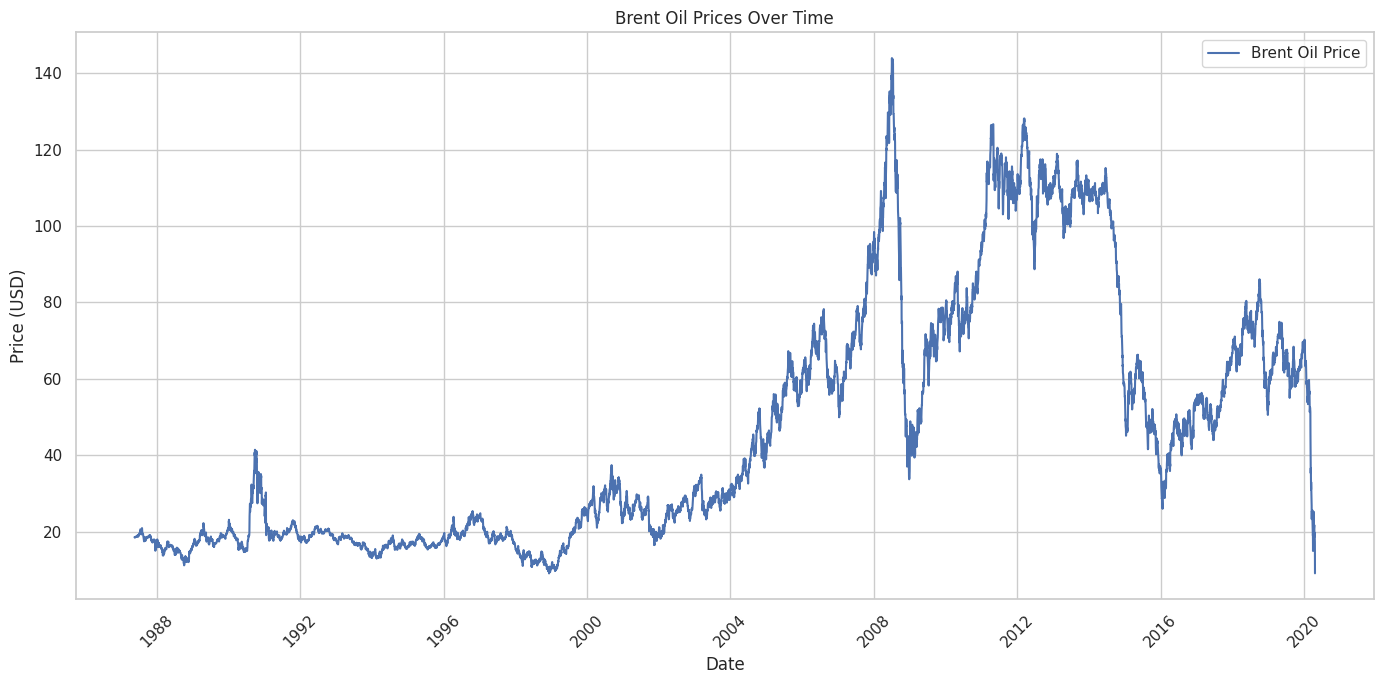

In [8]:

# Plotting the Brent oil prices over time
plt.figure(figsize=(14, 7))
plt.plot(brent_data['Date'], brent_data['Price'], label='Brent Oil Price')
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

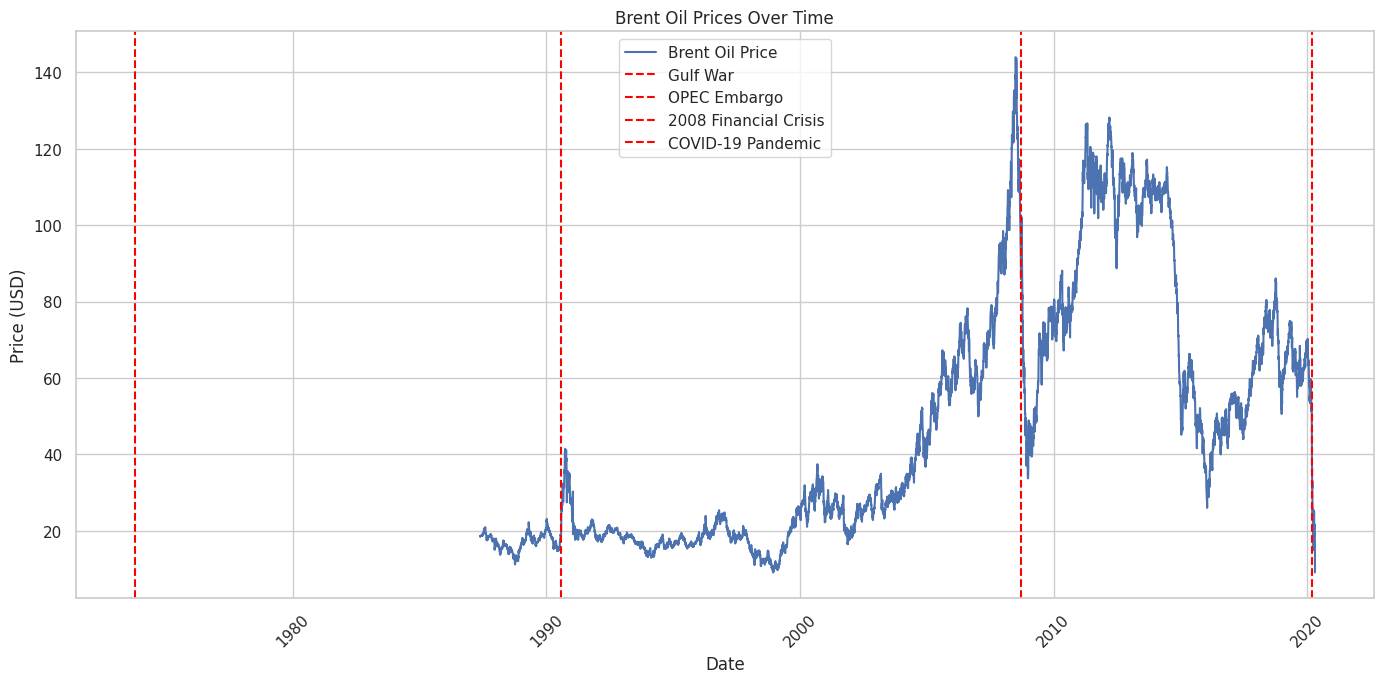

In [12]:
# Example: Add vertical lines for key events
key_events = {
    'Gulf War': '1990-08-02',
    'OPEC Embargo': '1973-10-06',
    '2008 Financial Crisis': '2008-09-15',
    'COVID-19 Pandemic': '2020-03-11'
}
plt.figure(figsize=(14, 7))
plt.plot(brent_data['Date'], brent_data['Price'], label='Brent Oil Price')
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
for event, date in key_events.items():
    plt.axvline(pd.to_datetime(date), color='red', linestyle='--', label=event)

plt.legend()
plt.show()

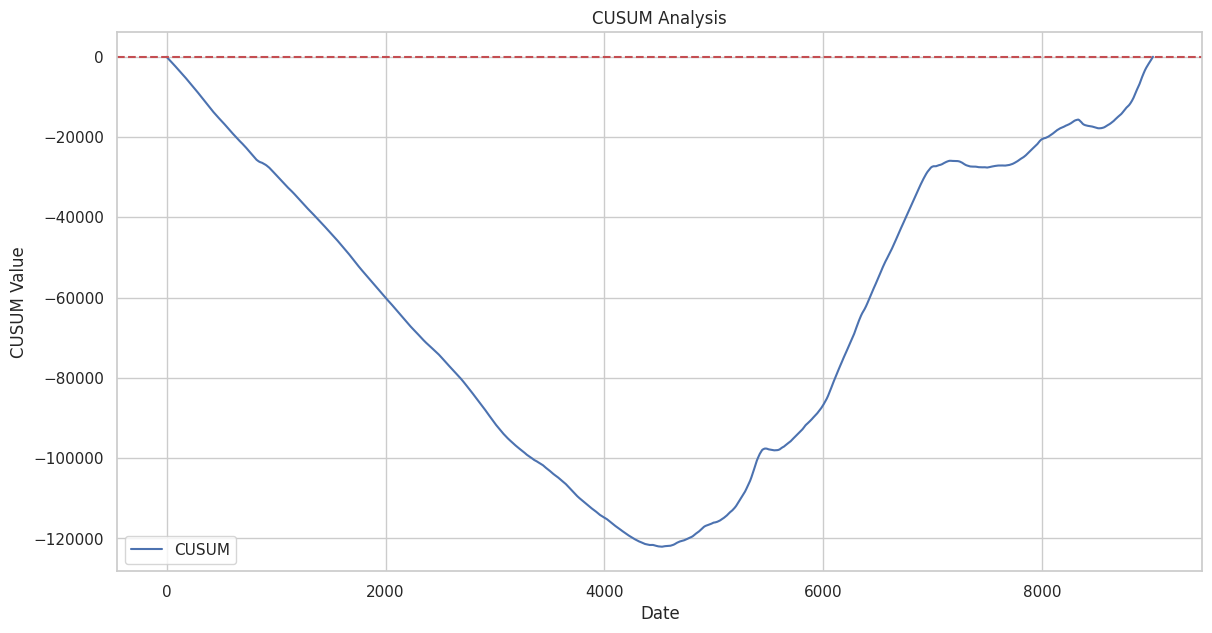

In [19]:
# CUSUM method
mean_price = brent_data['Price'].mean()
cusum = np.cumsum(brent_data['Price'] - mean_price)
plt.figure(figsize=(14, 7))
plt.plot(brent_data.index, cusum, label='CUSUM')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Date')
plt.ylabel('CUSUM Value')
plt.title('CUSUM Analysis')
plt.legend()
plt.show()

In [20]:
import pymc3 as pm
import numpy as np

# Extract the price data
prices = data['Price'].values

# Define the Bayesian model
with pm.Model() as oil_price_model:
    # Priors for the parameters
    mu = pm.Normal('mu', mu=0, sigma=10)  # Drift term
    sigma = pm.HalfNormal('sigma', sigma=10)  # Volatility term
    
    # Likelihood (price changes modeled as random walk)
    price_changes = pm.AR('price_changes', rho=[1], sigma=sigma, shape=len(prices))
    observed_prices = pm.Deterministic('observed_prices', pm.math.cumsum(price_changes) + prices[0])
    
    # Observed data
    pm.Normal('likelihood', mu=observed_prices, sigma=1, observed=prices)

# Sample from the posterior distribution
with oil_price_model:
    trace = pm.sample(1000, tune=1000, return_inferencedata=True)

ModuleNotFoundError: No module named 'pymc3'

In [ ]:
# Plot the posterior distributions
pm.plot_posterior(trace, var_names=['mu', 'sigma'])
plt.show()

# Summarize the results
summary = pm.summary(trace, var_names=['mu', 'sigma'])
print(summary)

In [ ]:
from sklearn.metrics import mean_squared_error

# Predicted prices based on the posterior mean
predicted_prices = trace_extended.posterior['observed_prices'].mean(dim=('chain', 'draw')).values

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(prices, predicted_prices))
print(f"RMSE: {rmse:.2f}")

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, prices, label='Actual Prices')
plt.plot(data.index, predicted_prices, label='Predicted Prices', linestyle='--')
plt.title('Brent Oil Prices: Actual vs. Predicted')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.legend()
plt.show()